<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pra%CC%80ctica_22_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Ejercicio 1: Normalización Min-Max

***1. Cargar el dataset wine de sklearn***


In [3]:
wine = datasets.load_wine()
x, y = wine.data, wine.target
df = pd.DataFrame(x, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


***2. Seleccionar una de las características numéricas (por ejemplo, alcohol)***

In [4]:
df['flavanoids'].values.reshape(-1, 1)

array([[3.06],
       [2.76],
       [3.24],
       [3.49],
       [2.69],
       [3.39],
       [2.52],
       [2.51],
       [2.98],
       [3.15],
       [3.32],
       [2.43],
       [2.76],
       [3.69],
       [3.64],
       [2.91],
       [3.14],
       [3.4 ],
       [3.93],
       [3.03],
       [3.17],
       [2.41],
       [2.88],
       [2.37],
       [2.61],
       [2.68],
       [2.94],
       [2.19],
       [2.97],
       [2.33],
       [3.25],
       [3.19],
       [2.69],
       [2.74],
       [2.53],
       [2.98],
       [2.68],
       [2.43],
       [2.64],
       [3.04],
       [3.29],
       [2.68],
       [3.56],
       [2.63],
       [3.  ],
       [2.65],
       [3.17],
       [3.39],
       [2.92],
       [3.54],
       [3.27],
       [2.99],
       [3.74],
       [2.79],
       [2.9 ],
       [2.78],
       [3.  ],
       [3.23],
       [3.67],
       [0.57],
       [1.09],
       [1.41],
       [1.79],
       [3.1 ],
       [1.75],
       [2.65],
       [3.

***3. Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales***

In [6]:
statistic, pvalue = stats.shapiro(df['flavanoids'])
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)
print("\n")

if pvalue > 0.05:
  print("Los datos tienen una distribución normal")
else:
  print("Los datos no tienen una distribución normal")

statistic: 0.9545261281841189
pvalue: 1.6788526899512583e-05


Los datos no tienen una distribución normal


***4. Aplicar la normalización Min-Max a los datos seleccionados***

In [7]:
scaler = MinMaxScaler()
normalizados1 = scaler.fit_transform(df[['flavanoids']])
print(normalizados1)

[[0.57383966]
 [0.51054852]
 [0.61181435]
 [0.66455696]
 [0.49578059]
 [0.64345992]
 [0.45991561]
 [0.45780591]
 [0.55696203]
 [0.592827  ]
 [0.62869198]
 [0.44092827]
 [0.51054852]
 [0.70675105]
 [0.69620253]
 [0.54219409]
 [0.5907173 ]
 [0.64556962]
 [0.75738397]
 [0.56751055]
 [0.59704641]
 [0.43670886]
 [0.53586498]
 [0.42827004]
 [0.47890295]
 [0.49367089]
 [0.54852321]
 [0.39029536]
 [0.55485232]
 [0.41983122]
 [0.61392405]
 [0.60126582]
 [0.49578059]
 [0.50632911]
 [0.46202532]
 [0.55696203]
 [0.49367089]
 [0.44092827]
 [0.48523207]
 [0.56962025]
 [0.62236287]
 [0.49367089]
 [0.67932489]
 [0.48312236]
 [0.56118143]
 [0.48734177]
 [0.59704641]
 [0.64345992]
 [0.5443038 ]
 [0.67510549]
 [0.61814346]
 [0.55907173]
 [0.71729958]
 [0.51687764]
 [0.54008439]
 [0.51476793]
 [0.56118143]
 [0.60970464]
 [0.70253165]
 [0.04852321]
 [0.15822785]
 [0.2257384 ]
 [0.30590717]
 [0.58227848]
 [0.29746835]
 [0.48734177]
 [0.59915612]
 [0.35021097]
 [0.20253165]
 [0.19831224]
 [0.14345992]
 [0.53

***5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados***

In [8]:
statistic, pvalue = stats.shapiro(normalizados1)
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)
print("\n")

if pvalue > 0.05:
  print("Los datos tienen una distribución normal")
else:
  print("Los datos no tienen una distribución normal")

statistic: 0.9545261281841186
pvalue: 1.6788526899511458e-05


Los datos no tienen una distribución normal


***6. Graficar los datos originales y los normalizados utilizando matplotlib o seaborn***

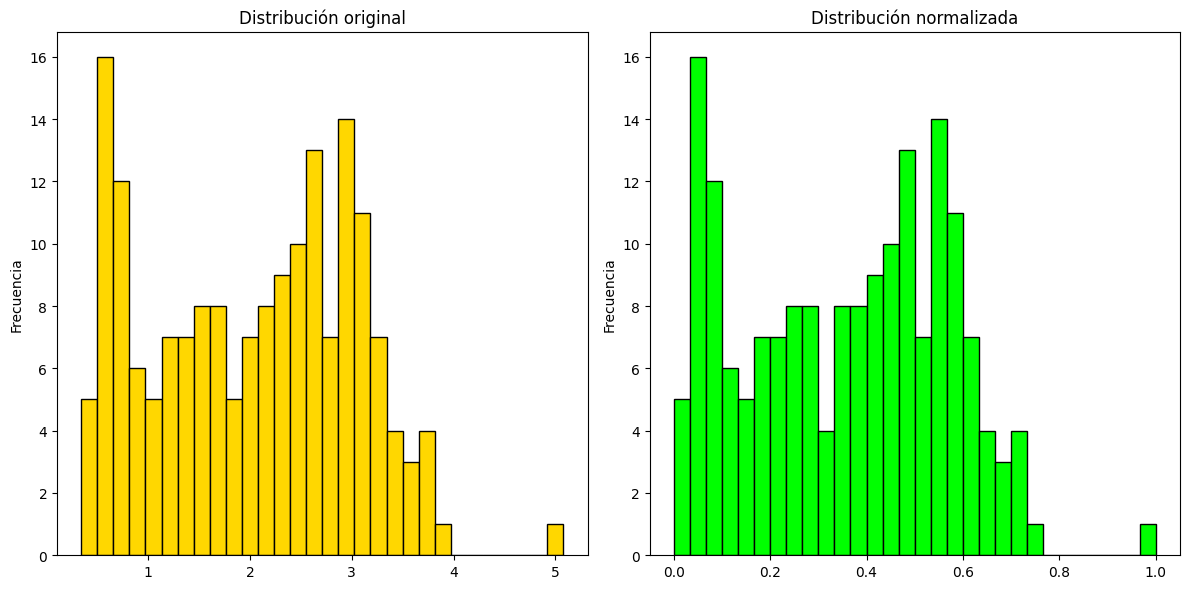

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df.flavanoids, bins=30, color='gold', edgecolor='black')
plt.title("Distribución original")
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(normalizados1, bins=30, color='lime', edgecolor='black')
plt.title("Distribución normalizada")
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

***7. Responder las siguientes preguntas***

*   **¿Cómo afectó la normalización Min-Max a la distribución de los datos?**

En forma general, hubo un cambio significativo en los valores sin embargo hay coincidencias en la distribución de los datos según las gráficas.

*   **¿Qué interpretas del p-valor antes y después de la normalización?**

El p-valor no se afectó, se mantuvo igual después de la normalización.

# Ejercicio 2: Normalización Z-Score




***1. Cargar el dataset wine de sklearn***

In [10]:
wine = datasets.load_wine()
x, y = wine.data, wine.target
df = pd.DataFrame(x, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


***2. Seleccionar una de las características numéricas (por ejemplo, malic_acid)***

In [11]:
df['magnesium'].values.reshape(-1, 1)

array([[127.],
       [100.],
       [101.],
       [113.],
       [118.],
       [112.],
       [ 96.],
       [121.],
       [ 97.],
       [ 98.],
       [105.],
       [ 95.],
       [ 89.],
       [ 91.],
       [102.],
       [112.],
       [120.],
       [115.],
       [108.],
       [116.],
       [126.],
       [102.],
       [101.],
       [ 95.],
       [ 96.],
       [124.],
       [ 93.],
       [ 94.],
       [107.],
       [ 96.],
       [101.],
       [106.],
       [104.],
       [132.],
       [110.],
       [100.],
       [110.],
       [ 98.],
       [ 98.],
       [128.],
       [117.],
       [ 90.],
       [101.],
       [103.],
       [107.],
       [111.],
       [102.],
       [101.],
       [103.],
       [108.],
       [ 92.],
       [ 94.],
       [111.],
       [115.],
       [118.],
       [116.],
       [118.],
       [102.],
       [108.],
       [ 88.],
       [101.],
       [100.],
       [ 94.],
       [ 87.],
       [104.],
       [ 98.],
       [ 7

***3. Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales***

In [13]:
statistic, pvalue = stats.shapiro(df['magnesium'])
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)
print("\n")

if pvalue > 0.05:
  print("Los datos tienen una distribución normal")
else:
  print("Los datos no tienen una distribución normal")

statistic: 0.9383312109016513
pvalue: 6.345693783266514e-07


Los datos no tienen una distribución normal


***4. Aplicar la normalización Z-Score a los datos seleccionados***

In [14]:
scaler = StandardScaler()
normalizados2 = scaler.fit_transform(df[['magnesium']])
print(normalizados2)

[[ 1.91390522]
 [ 0.01814502]
 [ 0.08835836]
 [ 0.93091845]
 [ 1.28198515]
 [ 0.86070511]
 [-0.26270834]
 [ 1.49262517]
 [-0.192495  ]
 [-0.12228166]
 [ 0.36921172]
 [-0.33292168]
 [-0.75420173]
 [-0.61377505]
 [ 0.1585717 ]
 [ 0.86070511]
 [ 1.42241183]
 [ 1.07134513]
 [ 0.57985175]
 [ 1.14155847]
 [ 1.84369188]
 [ 0.1585717 ]
 [ 0.08835836]
 [-0.33292168]
 [-0.26270834]
 [ 1.7032652 ]
 [-0.47334836]
 [-0.40313502]
 [ 0.50963841]
 [-0.26270834]
 [ 0.08835836]
 [ 0.43942506]
 [ 0.29899838]
 [ 2.26497192]
 [ 0.72027843]
 [ 0.01814502]
 [ 0.72027843]
 [-0.12228166]
 [-0.12228166]
 [ 1.98411856]
 [ 1.21177181]
 [-0.68398839]
 [ 0.08835836]
 [ 0.22878504]
 [ 0.50963841]
 [ 0.79049177]
 [ 0.1585717 ]
 [ 0.08835836]
 [ 0.22878504]
 [ 0.57985175]
 [-0.5435617 ]
 [-0.40313502]
 [ 0.79049177]
 [ 1.07134513]
 [ 1.28198515]
 [ 1.14155847]
 [ 1.28198515]
 [ 0.1585717 ]
 [ 0.57985175]
 [-0.82441507]
 [ 0.08835836]
 [ 0.01814502]
 [-0.40313502]
 [-0.89462841]
 [ 0.29899838]
 [-0.12228166]
 [-1.52654

***5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados***

In [15]:
statistic, pvalue = stats.shapiro(normalizados2)
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)
print("\n")

if pvalue > 0.05:
  print("Los datos tienen una distribución normal")
else:
  print("Los datos no tienen una distribución normal")

statistic: 0.9383312109016513
pvalue: 6.345693783266514e-07


Los datos no tienen una distribución normal


***6. Graficar los datos originales y los normalizados utilizando matplotlib o seaborn***

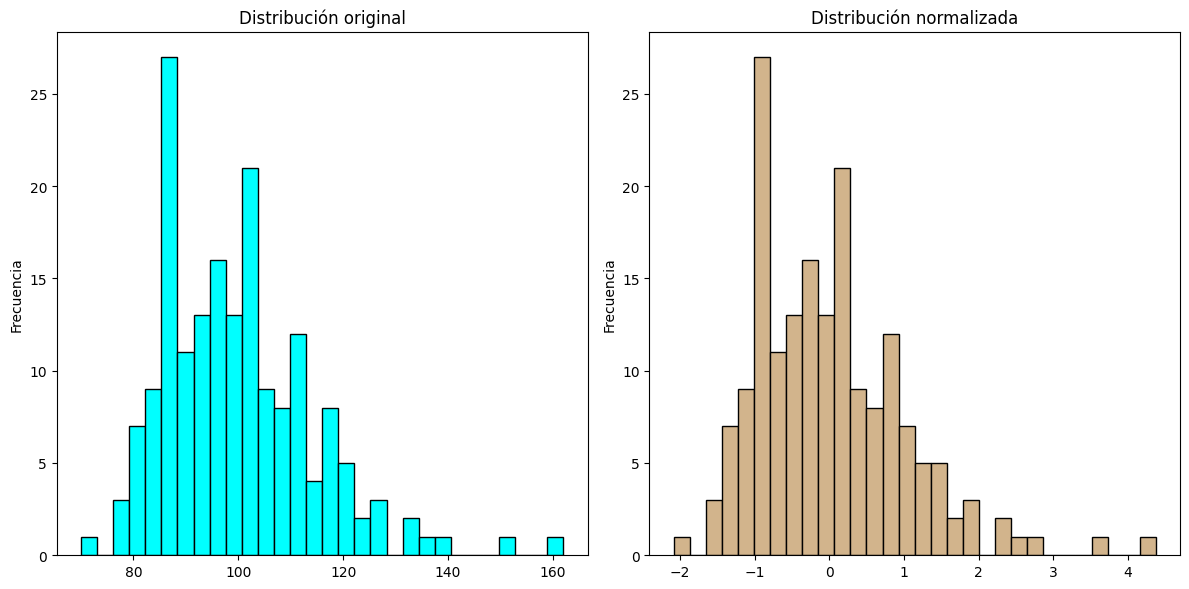

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df.magnesium, bins=30, color='cyan', edgecolor='black')
plt.title("Distribución original")
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(normalizados2, bins=30, color='tan', edgecolor='black')
plt.title("Distribución normalizada")
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

***7. Responder las siguientes preguntas***

*   **¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?**

La unica diferencia es en los valores(datos), la distribución es la misma entre la original y la normalizada.


*   **¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?**

Facilita la comparación de variables con diferentes escalas, elimina el sesgo de escala, cambio en la interpretación de los valores y en algunas ocasiones requiere que los datos sigan una distribución normal.



# Ejercicio 3: Transformación Logarítmica

***1. Cargar un conjunto de datos aleatorios generados con numpy***

In [20]:
datos = np.random.randint(1, 10001, size=5000)
datos

array([9681, 3850, 3544, ..., 8512, 4531, 9545])

***2. Aplicar una transformación logarítmica (np.log) a los datos***

In [21]:
normalizados3 = np.log(datos)
normalizados3

array([9.17792048, 8.25582843, 8.17301131, ..., 9.04923221, 8.41869794,
       9.16377274])

***3. Realizar una prueba de normalidad sobre los datos originales y transformados***

In [24]:
print("Datos originales")
statistic, pvalue = stats.shapiro(datos)
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)

print("\n")
print("Datos transformados")
statistic, pvalue = stats.shapiro(normalizados3)
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)

Datos originales
statistic: 0.9525954680557455
pvalue: 1.7683436957737392e-37


Datos transformados
statistic: 0.8117665656758034
pvalue: 1.8953938812475886e-60


***4. Graficar los datos originales y transformados utilizando matplotlib***

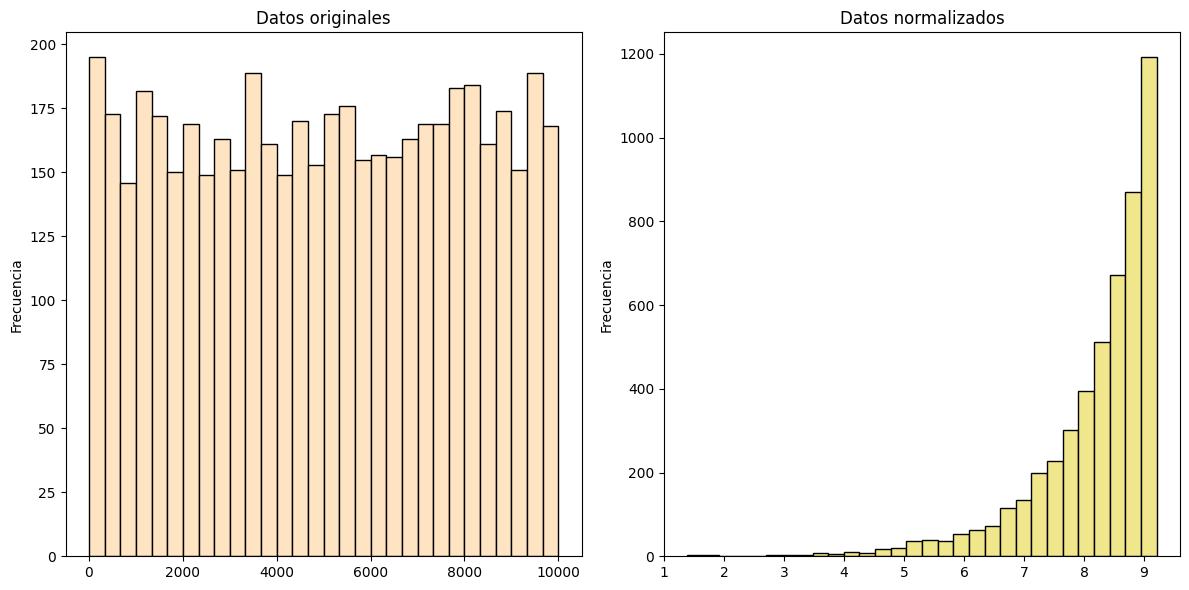

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(datos, bins=30, color='bisque', edgecolor='black')
plt.title("Datos originales")
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(normalizados3, bins=30, color='khaki', edgecolor='black')
plt.title("Datos normalizados")
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

***5. Responder las siguientes preguntas***

*   **¿Cómo afectó la transformación logarítmica a la distribución de los datos?**

La transformación logarítmica redujo la asimetría de los datos originales, detonando que las distribución sea parecida a una distribución normal.

*   **¿Qué interpretas del p-valor antes y después de la transformación logarítmica?**

El p-valor antes de la transformación indica que los datos originales no siguen una distribución normal. Después de la transformación, el p-valor tuvo un cambio positivo reduciendo la asimetría y haciendo que se acerque a una distribución normal.


# Ejercicio 4: Transformación Raíz Cuadrada

***1. Cargar un conjunto de datos aleatorios generados con numpy***

In [26]:
datos1 = np.random.randint(1, 10001, size=5001)
datos1

array([ 242, 8433, 3219, ..., 8342, 8586,  833])

***2. Aplicar una transformación de raíz cuadrada a los datos***

In [27]:
normalizados4 = np.sqrt(datos1)
normalizados4

array([15.55634919, 91.83136719, 56.73623181, ..., 91.33454987,
       92.66067127, 28.86173938])

***3. Realizar una prueba de normalidad sobre los datos originales y transformados***

In [28]:
print("Datos originales")
statistic, pvalue = stats.shapiro(datos1)
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)

print("\n")
print("Datos transformados")
statistic, pvalue = stats.shapiro(normalizados4)
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)

Datos originales
statistic: 0.956151417475341
pvalue: 2.36847067719334e-36


Datos transformados
statistic: 0.9483134722558761
pvalue: 9.337187362521429e-39


***4. Graficar los datos originales y transformados utilizando matplotlib***

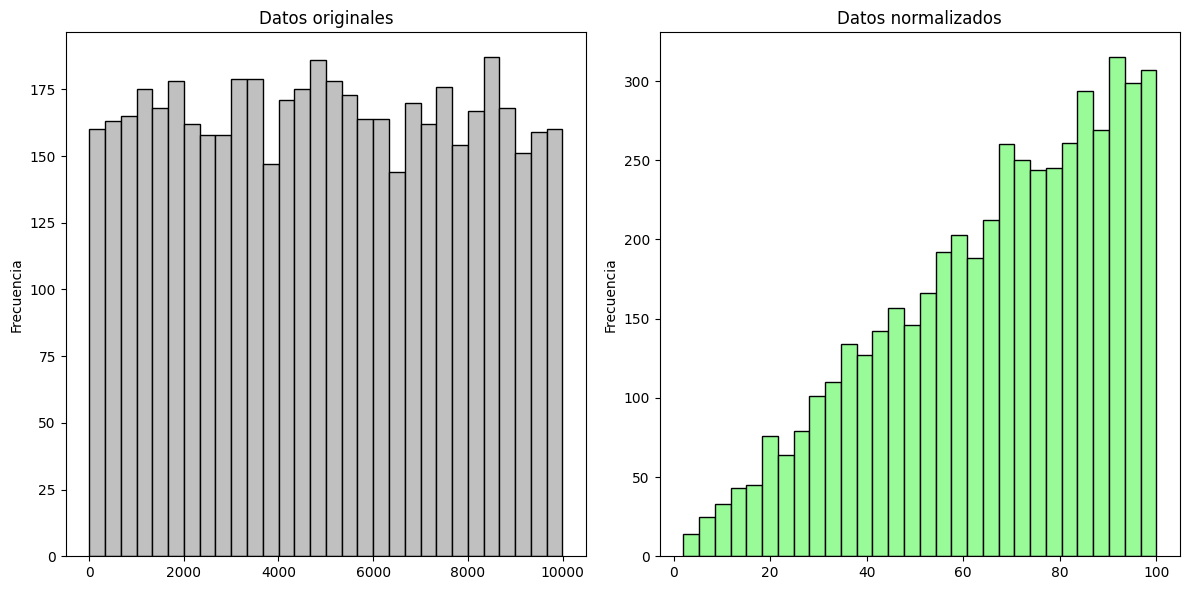

In [29]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(datos1, bins=30, color='silver', edgecolor='black')
plt.title("Datos originales")
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(normalizados4, bins=30, color='palegreen', edgecolor='black')
plt.title("Datos normalizados")
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

***5. Responder las siguientes preguntas***

*   **¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?**

Redujo la asimetría de los datos originales y hubo una reducción en la dispersión.

*   **¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?**

Reduce el impacto de los valores extremos. Al tomar la raíz cuadrada de los datos, la diferencia entre los valores grandes y pequeños se disminuye.

# Ejercicio 5: Transformación Box-Cox

***1. Cargar un conjunto de datos aleatorios generados con numpy***

In [30]:
datos3 = np.random.randint(1, 10001, size=5000)
datos3

array([4027, 7392, 3421, ...,  680, 7092, 1640])

***2. Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox***

In [34]:
normalizados5, lambda_ = stats.boxcox(datos3)
print("Valor de lambda:", lambda_)

normalizados5


Valor de lambda: 0.7112365367557899


array([513.79961676, 792.17415155, 457.37426971, ..., 143.99579395,
       769.13074412, 270.55106335])

***3. Realizar una prueba de normalidad sobre los datos originales y transformados***

In [35]:
print("Datos originales")
statistic, pvalue = stats.shapiro(datos3)
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)

print("\n")
print("Datos transformados")
statistic, pvalue = stats.shapiro(normalizados5)
print(f"statistic:",statistic)
print(f"pvalue:",pvalue)

Datos originales
statistic: 0.9537882927507031
pvalue: 4.157526880078064e-37


Datos transformados
statistic: 0.9552347713242867
pvalue: 1.200664099023234e-36


***4. Graficar los datos originales y transformados utilizando matplotlib***

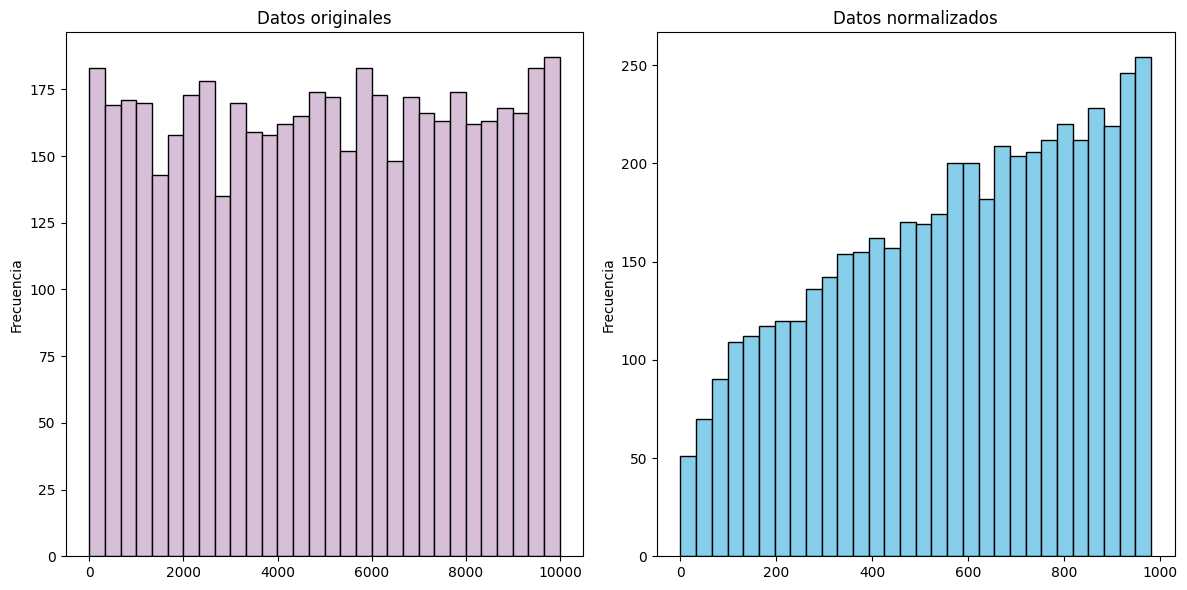

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(datos3, bins=30, color='thistle', edgecolor='black')
plt.title("Datos originales")
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(normalizados5, bins=30, color='skyblue', edgecolor='black')
plt.title("Datos normalizados")
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

***5. Responder las siguientes preguntas***

*   **¿Cómo afectó la transformación Box-Cox a la distribución de los datos?**

Redujo la asimetría de los datos orginales haciendo más similar a una distribución normal.

*   **¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?**

El valor lambda obtenido en la transformación Box-Cox indica el tipo de transformación que se aplicó a los datos para lograr la normalidad.

